In [532]:
import numpy as np
import pandas as pd
import pickle
import plotly.express as px
import matplotlib.pyplot as plt

## Setting up boundaries and grids for our prediction areas

For prediction: chose two similarly-sized neighborhoods (rectangles) with very different location, population density, population non-white, adult asthma prevalence, life expectancy, social vulnerabilty index, and prevalence of emissions point sources.

In [533]:
# Neighborhood 1
n1_top_lat = 29.686200
n1_bot_lat = 29.672427
n1_right_lon = -95.319700
n1_left_lon = -95.367249

# Neighborhood 2
n2_top_lat = 29.763409
n2_bot_lat = 29.750580
n2_right_lon = -95.486371
n2_left_lon = -95.526338

In [534]:
n1_top_lat - n1_bot_lat

0.01377300000000048

In [535]:
n2_top_lat-n2_bot_lat

0.01282899999999998

In [536]:
n1_right_lon - n1_left_lon

0.047549000000003616

In [537]:
n2_right_lon - n2_left_lon

0.039966999999990094

In [538]:
# Choosing increments / step size
print((n1_top_lat - n1_bot_lat)/6, "n1 N-S step")
print((n1_right_lon - n1_left_lon)/20, "n1 E-W step")
print((n2_top_lat-n2_bot_lat)/6, "n2 N-S step")
print((n2_right_lon - n2_left_lon)/17, "n2 E-W step")

0.00229550000000008 n1 N-S step
0.002377450000000181 n1 E-W step
0.0021381666666666632 n2 N-S step
0.0023509999999994174 n2 E-W step


In [539]:
# create grid
# n1
n1_lats = np.linspace(n1_bot_lat, n1_top_lat, 6)
n1_lons = np.linspace(n1_right_lon, n1_left_lon, 20)

# n2
# n1
n2_lats = np.linspace(n2_bot_lat, n2_top_lat, 6)
n2_lons = np.linspace(n2_right_lon, n2_left_lon, 17)

In [540]:
lats = []
lons = []
for lat in n1_lats:
    for lon in n1_lons:
        lats.append(lat)
        lons.append(lon)
print(len(lats))
print(len(lons))
n1_dict = {"lat": lats, "lon": lons}

120
120


In [541]:
lats = []
lons = []
for lat in n2_lats:
    for lon in n2_lons:
        lats.append(lat)
        lons.append(lon)
print(len(lats))
print(len(lons))
n2_dict = {"lat": lats, "lon": lons}

102
102


In [542]:
df_n1 = pd.DataFrame(n1_dict)
df_n1 = df_n1.round(6)
df_n1["neighborhood"] = 1
df_n1

,lat,lon,neighborhood
0,29.672427,-95.319700,1
1,29.672427,-95.322203,1
2,29.672427,-95.324705,1
3,29.672427,-95.327208,1
4,29.672427,-95.329710,1
...,...,...,...
115,29.686200,-95.357239,1
116,29.686200,-95.359741,1
117,29.686200,-95.362244,1
118,29.686200,-95.364746,1


In [543]:
df_n2 = pd.DataFrame(n2_dict)
df_n2 = df_n2.round(6)
df_n2["neighborhood"] = 2
df_n2

,lat,lon,neighborhood
0,29.750580,-95.486371,2
1,29.750580,-95.488869,2
2,29.750580,-95.491367,2
3,29.750580,-95.493865,2
4,29.750580,-95.496363,2
...,...,...,...
97,29.763409,-95.516346,2
98,29.763409,-95.518844,2
99,29.763409,-95.521342,2
100,29.763409,-95.523840,2


In [544]:
df_predict = df_n1.append(df_n2)
df_predict

/var/folders/w0/hp1p0mz546x0rnc9mft_s83w0000gn/T/ipykernel_57563/3246832723.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,lat,lon,neighborhood
0,29.672427,-95.319700,1
1,29.672427,-95.322203,1
2,29.672427,-95.324705,1
3,29.672427,-95.327208,1
4,29.672427,-95.329710,1
...,...,...,...
97,29.763409,-95.516346,2
98,29.763409,-95.518844,2
99,29.763409,-95.521342,2
100,29.763409,-95.523840,2


In [565]:
# neighborhood 1
px.set_mapbox_access_token("pk.eyJ1IjoidmlzaGFsdmpvc2VwaCIsImEiOiJjbDM2Y3hxaTMzYnlsM2JwZmoxZm9sZjZxIn0.ARpv_l4hUbukED2DPkPuxg")
fig = px.scatter_mapbox(df_n2, lat="lat", lon="lon", size_max=1, zoom=10)
fig.show()

In [546]:
# Export
filepath = "../../data/cleaned/predict.csv"
df_predict.to_csv(filepath)

## Merging together the prediction data (met, highway, facility)

In [547]:
df_met = pd.read_csv("../../data/cleaned/met_data_predict.csv", index_col=0)
df_fac = pd.read_csv("../../data/cleaned/facility_data_predict.csv", index_col=0)
df_traffic = pd.read_csv("../../data/cleaned/traffic_data_predict.csv", index_col=0)

In [548]:
# further prepare facilities data
df_fac = df_fac.rename(columns = {"latitude": "lat", "longitude": "lon"})
df_fac = df_fac[df_fac.columns.drop(list(df_fac.filter(regex='latitude')))]
df_fac = df_fac[df_fac.columns.drop(list(df_fac.filter(regex='longitude')))]
df_fac = df_fac[df_fac.columns.drop(list(df_fac.filter(regex='NO2')))]
df_fac

,lat,lon,14464311-RailYard-high_dist,14464311-RailYard-high_emsdist,14464611-RailYard-high_dist,14464611-RailYard-high_emsdist,14487911-RailYard-low_dist,14487911-RailYard-low_emsdist,14488111-RailYard-high_dist,14488111-RailYard-high_emsdist,14488511-RailYard-medium_dist,14488511-RailYard-medium_emsdist,14488811-RailYard-high_dist,14488811-RailYard-high_emsdist,14489211-RailYard-medium_dist,14489211-RailYard-medium_emsdist,14766711-Institution-medium_dist,14766711-Institution-medium_emsdist,16623211-ChemicalPlant-medium_dist,16623211-ChemicalPlant-medium_emsdist,16912111-RailYard-low_dist,16912111-RailYard-low_emsdist,16926811-RailYard-high_dist,16926811-RailYard-high_emsdist,16926911-RailYard-low_dist,16926911-RailYard-low_emsdist,17865111-RailYard-medium_dist,17865111-RailYard-medium_emsdist,17872111-RailYard-low_dist,17872111-RailYard-low_emsdist,17876311-RailYard-medium_dist,17876311-RailYard-medium_emsdist,18343611-RailYard-high_dist,18343611-RailYard-high_emsdist,18343711-RailYard-medium_dist,18343711-RailYard-medium_emsdist,3689111-Electricity-Heating-high_dist,3689111-Electricity-Heating-high_emsdist,3689311-FoodPlants-medium_dist,3689311-FoodPlants-medium_emsdist,4055311-Manufacturing-low_dist,4055311-Manufacturing-low_emsdist,4057311-Electricity-Heating-low_dist,4057311-Electricity-Heating-low_emsdist,4168611-ChemicalPlant-high_dist,4168611-ChemicalPlant-high_emsdist,4182511-Petroleum-high_dist,4182511-Petroleum-high_emsdist,4762811-Petroleum-high_dist,4762811-Petroleum-high_emsdist,4778711-ChemicalPlant-high_dist,4778711-ChemicalPlant-high_emsdist,4861111-Petroleum-low_dist,4861111-Petroleum-low_emsdist,4925211-ChemicalPlant-high_dist,4925211-ChemicalPlant-high_emsdist,4926211-FoodPlants-high_dist,4926211-FoodPlants-high_emsdist,4941211-Manufacturing-medium_dist,4941211-Manufacturing-medium_emsdist,4942411-Electricity-Heating-high_dist,4942411-Electricity-Heating-high_emsdist,4981411-Manufacturing-high_dist,4981411-Manufacturing-high_emsdist,6436411-ChemicalPlant-high_dist,6436411-ChemicalPlant-high_emsdist,6510011-Electricity-Heating-high_dist,6510011-Electricity-Heating-high_emsdist,6642011-FoodPlants-high_dist,6642011-FoodPlants-high_emsdist,6642511-ChemicalPlant-high_dist,6642511-ChemicalPlant-high_emsdist,6642811-FoodPlants-low_dist,6642811-FoodPlants-low_emsdist,6671811-Institution-low_dist,6671811-Institution-low_emsdist,9114211-FoodPlants-low_dist,9114211-FoodPlants-low_emsdist
0,29.672427,-95.319700,4.937815,9.022330,7.964432,13.984236,8.796813,0.767677,9.767132,1.710480,3.714522,2.998408,6.534754,4.363326,5.617103,1.982810,5.491405,2.251864,5.413223,1.498793,4.500436,0.021224,5.624805,8.814058,4.533486,0.021069,8.421492,1.322527,4.787827,1.163121,8.962697,1.242667,2.973289,38.663844,7.521388,1.480797,5.934712,3.028824,5.168014,1.638269,8.168334,0.330214,5.591287,0.105951,4.299057,80.645290,5.214293,26.114624,5.741583,130.310842,4.390800,14.487155,4.603384,0.005409,5.814465,17.139668,7.573020,2.092415,4.453752,2.886690,5.182359,2.837298,7.311298,8.829348,7.210111,1.917918,6.147600,29.789933,5.157965,20.594228,4.596558,31.443767,4.582177,0.641922,5.228828,0.692909,7.797883,0.210929
1,29.672427,-95.322203,5.009214,8.893730,7.970864,13.972951,8.826213,0.765119,9.673881,1.726968,3.797430,2.932944,6.573141,4.337844,5.577497,1.996890,5.360460,2.306873,5.520032,1.469792,4.635692,0.020604,5.695527,8.704613,4.648556,0.020547,8.456073,1.317119,4.915741,1.132855,8.995098,1.238191,2.937288,39.137738,7.593822,1.466673,5.807996,3.094906,5.225490,1.620250,8.207045,0.328657,5.452374,0.108650,4.435908,78.157319,5.327992,25.557342,5.873584,127.382270,4.491087,14.163652,4.453518,0.005591,5.833471,17.083826,7.632254,2.076176,4.584770,2.804198,5.046307,2.913794,7.393462,8.731227,7.262777,1.904010,6.276413,29.178548,5.128832,20.711205,4.732497,30.540560,4.546792,0.646918,5.100668,0.710319,7.718102,0.213109
2,29.672427,-95.324705,5.084015,8.762878,7.980110,13.956762,8.858045,0.762370,9.582109,1.743508,3.884338,2.867322,6.614695,

In [549]:
# clean traffic data
df_traffic = df_traffic.round(6)

In [550]:
df_predict

,lat,lon,neighborhood
0,29.672427,-95.319700,1
1,29.672427,-95.322203,1
2,29.672427,-95.324705,1
3,29.672427,-95.327208,1
4,29.672427,-95.329710,1
...,...,...,...
97,29.763409,-95.516346,2
98,29.763409,-95.518844,2
99,29.763409,-95.521342,2
100,29.763409,-95.523840,2


In [551]:
# Merge into one prediction file:
# begin with df_met
df_predict = df_predict.merge(df_met, on = ['lat', 'lon'], how = 'inner')
# merge df_fac
df_predict = df_predict.merge(df_fac, on = ['lat', 'lon'], how = 'inner')
# merge traffic
df_predict = df_predict.merge(df_traffic, on = ['lat', 'lon'], how = 'inner')
# clean and view
df_predict.drop(columns = ['lat', 'lon'], inplace=True)
neighborhood_ref = df_predict
df_predict

,neighborhood,prcp,srad,tmax,tmin,vp,14464311-RailYard-high_dist,14464311-RailYard-high_emsdist,14464611-RailYard-high_dist,14464611-RailYard-high_emsdist,14487911-RailYard-low_dist,14487911-RailYard-low_emsdist,14488111-RailYard-high_dist,14488111-RailYard-high_emsdist,14488511-RailYard-medium_dist,14488511-RailYard-medium_emsdist,14488811-RailYard-high_dist,14488811-RailYard-high_emsdist,14489211-RailYard-medium_dist,14489211-RailYard-medium_emsdist,14766711-Institution-medium_dist,14766711-Institution-medium_emsdist,16623211-ChemicalPlant-medium_dist,16623211-ChemicalPlant-medium_emsdist,16912111-RailYard-low_dist,16912111-RailYard-low_emsdist,16926811-RailYard-high_dist,16926811-RailYard-high_emsdist,16926911-RailYard-low_dist,16926911-RailYard-low_emsdist,17865111-RailYard-medium_dist,17865111-RailYard-medium_emsdist,17872111-RailYard-low_dist,17872111-RailYard-low_emsdist,17876311-RailYard-medium_dist,17876311-RailYard-medium_emsdist,18343611-RailYard-high_dist,18343611-RailYard-high_emsdist,18343711-RailYard-medium_dist,18343711-RailYard-medium_emsdist,3689111-Electricity-Heating-high_dist,3689111-Electricity-Heating-high_emsdist,3689311-FoodPlants-medium_dist,3689311-FoodPlants-medium_emsdist,4055311-Manufacturing-low_dist,4055311-Manufacturing-low_emsdist,4057311-Electricity-Heating-low_dist,4057311-Electricity-Heating-low_emsdist,4168611-ChemicalPlant-high_dist,4168611-ChemicalPlant-high_emsdist,4182511-Petroleum-high_dist,4182511-Petroleum-high_emsdist,4762811-Petroleum-high_dist,4762811-Petroleum-high_emsdist,4778711-ChemicalPlant-high_dist,4778711-ChemicalPlant-high_emsdist,4861111-Petroleum-low_dist,4861111-Petroleum-low_emsdist,4925211-ChemicalPlant-high_dist,4925211-ChemicalPlant-high_emsdist,4926211-FoodPlants-high_dist,4926211-FoodPlants-high_emsdist,4941211-Manufacturing-medium_dist,4941211-Manufacturing-medium_emsdist,4942411-Electricity-Heating-high_dist,4942411-Electricity-Heating-high_emsdist,4981411-Manufacturing-high_dist,4981411-Manufacturing-high_emsdist,6436411-ChemicalPlant-high_dist,6436411-ChemicalPlant-high_emsdist,6510011-Electricity-Heating-high_dist,6510011-Electricity-Heating-high_emsdist,6642011-FoodPlants-high_dist,6642011-FoodPlants-high_emsdist,6642511-ChemicalPlant-high_dist,6642511-ChemicalPlant-high_emsdist,6642811-FoodPlants-low_dist,6642811-FoodPlants-low_emsdist,6671811-Institution-low_dist,6671811-Institution-low_emsdist,9114211-FoodPlants-low_dist,9114211-FoodPlants-low_emsdist,number_intersections
0,1,6.244562,323.776058,25.944891,15.494343,1967.616314,4.937815,9.022330,7.964432,13.984236,8.796813,0.767677,9.767132,1.710480,3.714522,2.998408,6.534754,4.363326,5.617103,1.982810,5.491405,2.251864,5.413223,1.498793,4.500436,0.021224,5.624805,8.814058,4.533486,0.021069,8.421492,1.322527,4.787827,1.163121,8.962697,1.242667,2.973289,38.663844,7.521388,1.480797,5.934712,3.028824,5.168014,1.638269,8.168334,0.330214,5.591287,0.105951,4.299057,80.645290,5.214293,26.114624,5.741583,130.310842,4.390800,14.487155,4.603384,0.005409,5.814465,17.139668,7.573020,2.092415,4.453752,2.886690,5.182359,2.837298,7.311298,8.829348,7.210111,1.917918,6.147600,29.789933,5.157965,20.594228,4.596558,31.443767,4.582177,0.641922,5.228828,0.692909,7.797883,0.210929,1
1,1,6.244562,323.776058,25.944891,15.494343,1967.616314,5.009214,8.893730,7.970864,13.972951,8.826213,0.765119,9.673881,1.726968,3.797430,2.932944,6.573141,4.337844,5.577497,1.996890,5.360460,2.306873,5.520032,1.469792,4.635692,0.020604,5.695527,8.704613,4.648556,0.020547,8.456073,1.317119,4.915741,1.132855,8.995098,1.238191,2.937288,39.137738,7.593822,1.466673,5.807996,3.094906,5.225490,1.620250,8.207045,0.328657,5.452374,0.108650,4.435908,78.157319,5.327992,25.557342,5.873584,127.382270,4.491087,14.163652,4.453518,0.005591,5.833471,17.083826,7.632254,2.076176,4.584770,2.804198,5.046307,2.913794,7.393462,8.731227,7.262777,1.904010,6.276413,29.178548,5.128832,20.711205,4.732497,30.540560,4.546792,0.646918,5.100668,0.710319,7.718102,0.213109,1
2,1,

## Predicting

In [552]:
# Subset to the 61-ish columns from Vignesh's RF model
features = ['prcp', 'srad', 'tmax', '14464611-RailYard-high_dist', '14464611-RailYard-high_emsdist', '14487911-RailYard-low_dist', '14487911-RailYard-low_emsdist', '14488111-RailYard-high_dist', '14488111-RailYard-high_emsdist', '14489211-RailYard-medium_dist', '14489211-RailYard-medium_emsdist', '14766711-Institution-medium_dist', '14766711-Institution-medium_emsdist', '16926811-RailYard-high_dist', '16926811-RailYard-high_emsdist', '17865111-RailYard-medium_dist', '17865111-RailYard-medium_emsdist', '17876311-RailYard-medium_dist', '17876311-RailYard-medium_emsdist', '18343611-RailYard-high_emsdist', '18343711-RailYard-medium_dist', '18343711-RailYard-medium_emsdist', '3689111-Electricity-Heating-high_dist', '3689111-Electricity-Heating-high_emsdist', '3689311-FoodPlants-medium_dist', '3689311-FoodPlants-medium_emsdist', '4055311-Manufacturing-low_dist', '4055311-Manufacturing-low_emsdist', '4057311-Electricity-Heating-low_dist', '4057311-Electricity-Heating-low_emsdist', '4778711-ChemicalPlant-high_emsdist', '4861111-Petroleum-low_dist', '4861111-Petroleum-low_emsdist', '4925211-ChemicalPlant-high_dist', '4925211-ChemicalPlant-high_emsdist', '4926211-FoodPlants-high_dist', '4926211-FoodPlants-high_emsdist', '4942411-Electricity-Heating-high_dist', '4942411-Electricity-Heating-high_emsdist', '4981411-Manufacturing-high_dist', '4981411-Manufacturing-high_emsdist', '6436411-ChemicalPlant-high_dist', '6642011-FoodPlants-high_dist', '6642011-FoodPlants-high_emsdist', '6642811-FoodPlants-low_dist', '6642811-FoodPlants-low_emsdist', '6671811-Institution-low_dist', '6671811-Institution-low_emsdist', '9114211-FoodPlants-low_dist', '9114211-FoodPlants-low_emsdist', 'number_intersections']
df_predict = df_predict[features]

In [553]:
df_predict

,prcp,srad,tmax,14464611-RailYard-high_dist,14464611-RailYard-high_emsdist,14487911-RailYard-low_dist,14487911-RailYard-low_emsdist,14488111-RailYard-high_dist,14488111-RailYard-high_emsdist,14489211-RailYard-medium_dist,14489211-RailYard-medium_emsdist,14766711-Institution-medium_dist,14766711-Institution-medium_emsdist,16926811-RailYard-high_dist,16926811-RailYard-high_emsdist,17865111-RailYard-medium_dist,17865111-RailYard-medium_emsdist,17876311-RailYard-medium_dist,17876311-RailYard-medium_emsdist,18343611-RailYard-high_emsdist,18343711-RailYard-medium_dist,18343711-RailYard-medium_emsdist,3689111-Electricity-Heating-high_dist,3689111-Electricity-Heating-high_emsdist,3689311-FoodPlants-medium_dist,3689311-FoodPlants-medium_emsdist,4055311-Manufacturing-low_dist,4055311-Manufacturing-low_emsdist,4057311-Electricity-Heating-low_dist,4057311-Electricity-Heating-low_emsdist,4778711-ChemicalPlant-high_emsdist,4861111-Petroleum-low_dist,4861111-Petroleum-low_emsdist,4925211-ChemicalPlant-high_dist,4925211-ChemicalPlant-high_emsdist,4926211-FoodPlants-high_dist,4926211-FoodPlants-high_emsdist,4942411-Electricity-Heating-high_dist,4942411-Electricity-Heating-high_emsdist,4981411-Manufacturing-high_dist,4981411-Manufacturing-high_emsdist,6436411-ChemicalPlant-high_dist,6642011-FoodPlants-high_dist,6642011-FoodPlants-high_emsdist,6642811-FoodPlants-low_dist,6642811-FoodPlants-low_emsdist,6671811-Institution-low_dist,6671811-Institution-low_emsdist,9114211-FoodPlants-low_dist,9114211-FoodPlants-low_emsdist,number_intersections
0,6.244562,323.776058,25.944891,7.964432,13.984236,8.796813,0.767677,9.767132,1.710480,5.617103,1.982810,5.491405,2.251864,5.624805,8.814058,8.421492,1.322527,8.962697,1.242667,38.663844,7.521388,1.480797,5.934712,3.028824,5.168014,1.638269,8.168334,0.330214,5.591287,0.105951,14.487155,4.603384,0.005409,5.814465,17.139668,7.573020,2.092415,5.182359,2.837298,7.311298,8.829348,7.210111,5.157965,20.594228,4.582177,0.641922,5.228828,0.692909,7.797883,0.210929,1
1,6.244562,323.776058,25.944891,7.970864,13.972951,8.826213,0.765119,9.673881,1.726968,5.577497,1.996890,5.360460,2.306873,5.695527,8.704613,8.456073,1.317119,8.995098,1.238191,39.137738,7.593822,1.466673,5.807996,3.094906,5.225490,1.620250,8.207045,0.328657,5.452374,0.108650,14.163652,4.453518,0.005591,5.833471,17.083826,7.632254,2.076176,5.046307,2.913794,7.393462,8.731227,7.262777,5.128832,20.711205,4.546792,0.646918,5.100668,0.710319,7.718102,0.213109,1
2,6.244562,323.776058,25.944891,7.980110,13.956762,8.858045,0.762370,9.582109,1.743508,5.541690,2.009793,5.230598,2.364147,5.769260,8.593366,8.493151,1.311368,9.029862,1.233424,39.523623,7.668480,1.452393,5.682470,3.163272,5.286580,1.601527,8.248289,0.327013,5.314127,0.111476,13.846209,4.303733,0.005786,5.856254,17.017363,7.693935,2.059531,4.911130,2.993995,7.477703,8.632865,7.318120,5.103960,20.812134,4.516134,0.651309,4.973790,0.728438,7.640469,0.215275,1
3,6.217628,323.016971,25.949672,7.992167,13.935706,8.892307,0.759432,9.491787,1.760099,5.509726,2.021453,5.101794,2.423834,5.845945,8.480640,8.532721,1.305287,9.066991,1.228373,39.813245,7.745357,1.437978,5.558113,3.234047,5.351207,1.582185,8.292061,0.325287,5.176486,0.114441,13.535249,4.153912,0.005994,5.882789,16.940604,7.758055,2.042509,4.776790,3.078197,7.564017,8.534354,7.376124,5.083390,20.896352,4.490275,0.655060,4.848188,0.747310,7.564985,0.217423,1
4,6.217628,323.016971,25.949672,8.007014,13.909867,8.928947,0.756316,9.403028,1.776713,5.481698,2.031788,4.974238,2.485989,5.925411,8.366907,8.574720,1.298894,9.106426,1.223054,39.999661,7.824326,1.423464,5.435107,3.307240,5.419197,1.562335,8.338285,0.323484,5.039613,0.117549,13.231538,4.004177,0.006219,5.913004,16.854038,7.824502,2.025164,4.643473,3.166574,7.652266,8.435933,7.436682,5.067191,20.963152,4.469320,0.658131,4.724068,0.766945,7.491777,0.219547,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [554]:
model = pickle.load(open("predict_info/rf_model.pkl", 'rb'))

np_no2_predict = model.predict(df_predict)

print(len(np_no2_predict))
np_no2_predict

/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning:

Trying to unpickle estimator DecisionTreeRegressor from version 0.24.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations



222


/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning:

Trying to unpickle estimator RandomForestRegressor from version 0.24.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations

/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names



array([0.00186898, 0.00186898, 0.00186898, 0.00186968, 0.00186968,
       0.00186968, 0.00186944, 0.00186849, 0.00186026, 0.00186026,
       0.00186026, 0.00186088, 0.00186088, 0.00185656, 0.00185656,
       0.00185653, 0.00185653, 0.00185139, 0.00185126, 0.00185063,
       0.00186968, 0.00188318, 0.00186968, 0.00186968, 0.00186968,
       0.00186874, 0.00187669, 0.00187669, 0.00186874, 0.00186874,
       0.00186026, 0.00186026, 0.00186088, 0.00186088, 0.00186088,
       0.0018558 , 0.00185578, 0.00185515, 0.00185445, 0.00185534,
       0.00189457, 0.00188184, 0.00188318, 0.00186648, 0.00186648,
       0.00186648, 0.00187442, 0.00187442, 0.00187238, 0.00186648,
       0.00186648, 0.00186648, 0.00186648, 0.00185881, 0.00186738,
       0.00186533, 0.00185518, 0.00185515, 0.00186942, 0.00187931,
       0.00190589, 0.00192142, 0.0019204 , 0.00191656, 0.00192527,
       0.00192784, 0.00192102, 0.00192306, 0.00191512, 0.00191512,
       0.00191512, 0.00191243, 0.00190372, 0.00190372, 0.00191

In [555]:
df_no2_predict = pd.DataFrame(np_no2_predict, columns = ['no2_predicted'])
df_no2_predict = df_no2_predict * 1000

In [556]:
display(df_no2_predict.describe()['no2_predicted'])

count    222.000000
mean       1.804823
std        0.096721
min        1.682439
25%        1.707563
50%        1.855602
75%        1.890749
max        1.941496
Name: no2_predicted, dtype: float64

(0.0, 5.0)

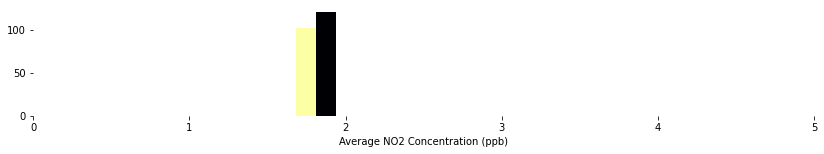

In [557]:
# Histogram
fig, ax = plt.subplots(figsize = (14, 2))
n, bins, patches = plt.hist(df_no2_predict["no2_predicted"], bins = 2)

cm = plt.cm.get_cmap('inferno')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - max(bin_centers)
col /= min(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

ax.set_xlabel("Average NO2 Concentration (ppb)")
for ax, spine in ax.spines.items():
    spine.set_visible(False)

plt.xlim(0,5)


In [558]:
df_no2_predict_nbhnums = df_no2_predict.join(neighborhood_ref)
df_no2_predict_nbhnums

,no2_predicted,neighborhood,prcp,srad,tmax,tmin,vp,14464311-RailYard-high_dist,14464311-RailYard-high_emsdist,14464611-RailYard-high_dist,14464611-RailYard-high_emsdist,14487911-RailYard-low_dist,14487911-RailYard-low_emsdist,14488111-RailYard-high_dist,14488111-RailYard-high_emsdist,14488511-RailYard-medium_dist,14488511-RailYard-medium_emsdist,14488811-RailYard-high_dist,14488811-RailYard-high_emsdist,14489211-RailYard-medium_dist,14489211-RailYard-medium_emsdist,14766711-Institution-medium_dist,14766711-Institution-medium_emsdist,16623211-ChemicalPlant-medium_dist,16623211-ChemicalPlant-medium_emsdist,16912111-RailYard-low_dist,16912111-RailYard-low_emsdist,16926811-RailYard-high_dist,16926811-RailYard-high_emsdist,16926911-RailYard-low_dist,16926911-RailYard-low_emsdist,17865111-RailYard-medium_dist,17865111-RailYard-medium_emsdist,17872111-RailYard-low_dist,17872111-RailYard-low_emsdist,17876311-RailYard-medium_dist,17876311-RailYard-medium_emsdist,18343611-RailYard-high_dist,18343611-RailYard-high_emsdist,18343711-RailYard-medium_dist,18343711-RailYard-medium_emsdist,3689111-Electricity-Heating-high_dist,3689111-Electricity-Heating-high_emsdist,3689311-FoodPlants-medium_dist,3689311-FoodPlants-medium_emsdist,4055311-Manufacturing-low_dist,4055311-Manufacturing-low_emsdist,4057311-Electricity-Heating-low_dist,4057311-Electricity-Heating-low_emsdist,4168611-ChemicalPlant-high_dist,4168611-ChemicalPlant-high_emsdist,4182511-Petroleum-high_dist,4182511-Petroleum-high_emsdist,4762811-Petroleum-high_dist,4762811-Petroleum-high_emsdist,4778711-ChemicalPlant-high_dist,4778711-ChemicalPlant-high_emsdist,4861111-Petroleum-low_dist,4861111-Petroleum-low_emsdist,4925211-ChemicalPlant-high_dist,4925211-ChemicalPlant-high_emsdist,4926211-FoodPlants-high_dist,4926211-FoodPlants-high_emsdist,4941211-Manufacturing-medium_dist,4941211-Manufacturing-medium_emsdist,4942411-Electricity-Heating-high_dist,4942411-Electricity-Heating-high_emsdist,4981411-Manufacturing-high_dist,4981411-Manufacturing-high_emsdist,6436411-ChemicalPlant-high_dist,6436411-ChemicalPlant-high_emsdist,6510011-Electricity-Heating-high_dist,6510011-Electricity-Heating-high_emsdist,6642011-FoodPlants-high_dist,6642011-FoodPlants-high_emsdist,6642511-ChemicalPlant-high_dist,6642511-ChemicalPlant-high_emsdist,6642811-FoodPlants-low_dist,6642811-FoodPlants-low_emsdist,6671811-Institution-low_dist,6671811-Institution-low_emsdist,9114211-FoodPlants-low_dist,9114211-FoodPlants-low_emsdist,number_intersections
0,1.868982,1,6.244562,323.776058,25.944891,15.494343,1967.616314,4.937815,9.022330,7.964432,13.984236,8.796813,0.767677,9.767132,1.710480,3.714522,2.998408,6.534754,4.363326,5.617103,1.982810,5.491405,2.251864,5.413223,1.498793,4.500436,0.021224,5.624805,8.814058,4.533486,0.021069,8.421492,1.322527,4.787827,1.163121,8.962697,1.242667,2.973289,38.663844,7.521388,1.480797,5.934712,3.028824,5.168014,1.638269,8.168334,0.330214,5.591287,0.105951,4.299057,80.645290,5.214293,26.114624,5.741583,130.310842,4.390800,14.487155,4.603384,0.005409,5.814465,17.139668,7.573020,2.092415,4.453752,2.886690,5.182359,2.837298,7.311298,8.829348,7.210111,1.917918,6.147600,29.789933,5.157965,20.594228,4.596558,31.443767,4.582177,0.641922,5.228828,0.692909,7.797883,0.210929,1
1,1.868982,1,6.244562,323.776058,25.944891,15.494343,1967.616314,5.009214,8.893730,7.970864,13.972951,8.826213,0.765119,9.673881,1.726968,3.797430,2.932944,6.573141,4.337844,5.577497,1.996890,5.360460,2.306873,5.520032,1.469792,4.635692,0.020604,5.695527,8.704613,4.648556,0.020547,8.456073,1.317119,4.915741,1.132855,8.995098,1.238191,2.937288,39.137738,7.593822,1.466673,5.807996,3.094906,5.225490,1.620250,8.207045,0.328657,5.452374,0.108650,4.435908,78.157319,5.327992,25.557342,5.873584,127.382270,4.491087,14.163652,4.453518,0.005591,5.833471,17.083826,7.632254,2.076176,4.584770,2.804198,5.046307,2.913794,7.393462,8.731227,7.262777,1.904010,6.276413,29.178548,5.128832,20.711205,4.732497,30.540560,4.546792,0.646918,5.100668,0

In [559]:
df1 = df_no2_predict_nbhnums[df_no2_predict_nbhnums["neighborhood"] == 1]
df1

,no2_predicted,neighborhood,prcp,srad,tmax,tmin,vp,14464311-RailYard-high_dist,14464311-RailYard-high_emsdist,14464611-RailYard-high_dist,14464611-RailYard-high_emsdist,14487911-RailYard-low_dist,14487911-RailYard-low_emsdist,14488111-RailYard-high_dist,14488111-RailYard-high_emsdist,14488511-RailYard-medium_dist,14488511-RailYard-medium_emsdist,14488811-RailYard-high_dist,14488811-RailYard-high_emsdist,14489211-RailYard-medium_dist,14489211-RailYard-medium_emsdist,14766711-Institution-medium_dist,14766711-Institution-medium_emsdist,16623211-ChemicalPlant-medium_dist,16623211-ChemicalPlant-medium_emsdist,16912111-RailYard-low_dist,16912111-RailYard-low_emsdist,16926811-RailYard-high_dist,16926811-RailYard-high_emsdist,16926911-RailYard-low_dist,16926911-RailYard-low_emsdist,17865111-RailYard-medium_dist,17865111-RailYard-medium_emsdist,17872111-RailYard-low_dist,17872111-RailYard-low_emsdist,17876311-RailYard-medium_dist,17876311-RailYard-medium_emsdist,18343611-RailYard-high_dist,18343611-RailYard-high_emsdist,18343711-RailYard-medium_dist,18343711-RailYard-medium_emsdist,3689111-Electricity-Heating-high_dist,3689111-Electricity-Heating-high_emsdist,3689311-FoodPlants-medium_dist,3689311-FoodPlants-medium_emsdist,4055311-Manufacturing-low_dist,4055311-Manufacturing-low_emsdist,4057311-Electricity-Heating-low_dist,4057311-Electricity-Heating-low_emsdist,4168611-ChemicalPlant-high_dist,4168611-ChemicalPlant-high_emsdist,4182511-Petroleum-high_dist,4182511-Petroleum-high_emsdist,4762811-Petroleum-high_dist,4762811-Petroleum-high_emsdist,4778711-ChemicalPlant-high_dist,4778711-ChemicalPlant-high_emsdist,4861111-Petroleum-low_dist,4861111-Petroleum-low_emsdist,4925211-ChemicalPlant-high_dist,4925211-ChemicalPlant-high_emsdist,4926211-FoodPlants-high_dist,4926211-FoodPlants-high_emsdist,4941211-Manufacturing-medium_dist,4941211-Manufacturing-medium_emsdist,4942411-Electricity-Heating-high_dist,4942411-Electricity-Heating-high_emsdist,4981411-Manufacturing-high_dist,4981411-Manufacturing-high_emsdist,6436411-ChemicalPlant-high_dist,6436411-ChemicalPlant-high_emsdist,6510011-Electricity-Heating-high_dist,6510011-Electricity-Heating-high_emsdist,6642011-FoodPlants-high_dist,6642011-FoodPlants-high_emsdist,6642511-ChemicalPlant-high_dist,6642511-ChemicalPlant-high_emsdist,6642811-FoodPlants-low_dist,6642811-FoodPlants-low_emsdist,6671811-Institution-low_dist,6671811-Institution-low_emsdist,9114211-FoodPlants-low_dist,9114211-FoodPlants-low_emsdist,number_intersections
0,1.868982,1,6.244562,323.776058,25.944891,15.494343,1967.616314,4.937815,9.022330,7.964432,13.984236,8.796813,0.767677,9.767132,1.710480,3.714522,2.998408,6.534754,4.363326,5.617103,1.982810,5.491405,2.251864,5.413223,1.498793,4.500436,0.021224,5.624805,8.814058,4.533486,0.021069,8.421492,1.322527,4.787827,1.163121,8.962697,1.242667,2.973289,38.663844,7.521388,1.480797,5.934712,3.028824,5.168014,1.638269,8.168334,0.330214,5.591287,0.105951,4.299057,80.645290,5.214293,26.114624,5.741583,130.310842,4.390800,14.487155,4.603384,0.005409,5.814465,17.139668,7.573020,2.092415,4.453752,2.886690,5.182359,2.837298,7.311298,8.829348,7.210111,1.917918,6.147600,29.789933,5.157965,20.594228,4.596558,31.443767,4.582177,0.641922,5.228828,0.692909,7.797883,0.210929,1
1,1.868982,1,6.244562,323.776058,25.944891,15.494343,1967.616314,5.009214,8.893730,7.970864,13.972951,8.826213,0.765119,9.673881,1.726968,3.797430,2.932944,6.573141,4.337844,5.577497,1.996890,5.360460,2.306873,5.520032,1.469792,4.635692,0.020604,5.695527,8.704613,4.648556,0.020547,8.456073,1.317119,4.915741,1.132855,8.995098,1.238191,2.937288,39.137738,7.593822,1.466673,5.807996,3.094906,5.225490,1.620250,8.207045,0.328657,5.452374,0.108650,4.435908,78.157319,5.327992,25.557342,5.873584,127.382270,4.491087,14.163652,4.453518,0.005591,5.833471,17.083826,7.632254,2.076176,4.584770,2.804198,5.046307,2.913794,7.393462,8.731227,7.262777,1.904010,6.276413,29.178548,5.128832,20.711205,4.732497,30.540560,4.546792,0.646918,5.100668,0

In [560]:
df2 = df_no2_predict_nbhnums[df_no2_predict_nbhnums["neighborhood"] == 2]
df2

,no2_predicted,neighborhood,prcp,srad,tmax,tmin,vp,14464311-RailYard-high_dist,14464311-RailYard-high_emsdist,14464611-RailYard-high_dist,14464611-RailYard-high_emsdist,14487911-RailYard-low_dist,14487911-RailYard-low_emsdist,14488111-RailYard-high_dist,14488111-RailYard-high_emsdist,14488511-RailYard-medium_dist,14488511-RailYard-medium_emsdist,14488811-RailYard-high_dist,14488811-RailYard-high_emsdist,14489211-RailYard-medium_dist,14489211-RailYard-medium_emsdist,14766711-Institution-medium_dist,14766711-Institution-medium_emsdist,16623211-ChemicalPlant-medium_dist,16623211-ChemicalPlant-medium_emsdist,16912111-RailYard-low_dist,16912111-RailYard-low_emsdist,16926811-RailYard-high_dist,16926811-RailYard-high_emsdist,16926911-RailYard-low_dist,16926911-RailYard-low_emsdist,17865111-RailYard-medium_dist,17865111-RailYard-medium_emsdist,17872111-RailYard-low_dist,17872111-RailYard-low_emsdist,17876311-RailYard-medium_dist,17876311-RailYard-medium_emsdist,18343611-RailYard-high_dist,18343611-RailYard-high_emsdist,18343711-RailYard-medium_dist,18343711-RailYard-medium_emsdist,3689111-Electricity-Heating-high_dist,3689111-Electricity-Heating-high_emsdist,3689311-FoodPlants-medium_dist,3689311-FoodPlants-medium_emsdist,4055311-Manufacturing-low_dist,4055311-Manufacturing-low_emsdist,4057311-Electricity-Heating-low_dist,4057311-Electricity-Heating-low_emsdist,4168611-ChemicalPlant-high_dist,4168611-ChemicalPlant-high_emsdist,4182511-Petroleum-high_dist,4182511-Petroleum-high_emsdist,4762811-Petroleum-high_dist,4762811-Petroleum-high_emsdist,4778711-ChemicalPlant-high_dist,4778711-ChemicalPlant-high_emsdist,4861111-Petroleum-low_dist,4861111-Petroleum-low_emsdist,4925211-ChemicalPlant-high_dist,4925211-ChemicalPlant-high_emsdist,4926211-FoodPlants-high_dist,4926211-FoodPlants-high_emsdist,4941211-Manufacturing-medium_dist,4941211-Manufacturing-medium_emsdist,4942411-Electricity-Heating-high_dist,4942411-Electricity-Heating-high_emsdist,4981411-Manufacturing-high_dist,4981411-Manufacturing-high_emsdist,6436411-ChemicalPlant-high_dist,6436411-ChemicalPlant-high_emsdist,6510011-Electricity-Heating-high_dist,6510011-Electricity-Heating-high_emsdist,6642011-FoodPlants-high_dist,6642011-FoodPlants-high_emsdist,6642511-ChemicalPlant-high_dist,6642511-ChemicalPlant-high_emsdist,6642811-FoodPlants-low_dist,6642811-FoodPlants-low_emsdist,6671811-Institution-low_dist,6671811-Institution-low_emsdist,9114211-FoodPlants-low_dist,9114211-FoodPlants-low_emsdist,number_intersections
120,1.734243,2,5.898577,324.875255,26.091204,15.205693,1933.224343,12.324653,3.614755,10.571950,10.535095,12.083635,0.558864,4.468783,3.738485,12.204084,0.912617,11.629700,2.451762,8.440798,1.319502,5.868691,2.107097,13.893098,0.583981,14.441870,0.006614,12.589285,3.938060,13.657157,0.006994,12.188105,0.913813,14.338184,0.388391,12.322126,0.903874,9.551206,12.036051,13.616757,0.817937,5.450234,3.298060,11.921198,0.710214,12.286072,0.219541,5.835948,0.101509,14.357176,24.148113,14.045360,9.694967,15.251133,49.058027,13.052533,4.873399,7.845011,0.003174,10.660595,9.348259,13.012320,1.217761,14.223392,0.903905,6.197263,2.372644,13.959856,4.624260,12.530241,1.103602,15.404824,11.888263,8.926415,11.899995,14.547523,9.935238,8.894347,0.330704,6.140638,0.590020,5.912167,0.278206,9
121,1.731059,2,5.898577,324.875255,26.091204,15.205693,1933.224343,12.473910,3.571502,10.717272,10.392244,12.227927,0.552269,4.599336,3.632368,12.351292,0.901740,11.778964,2.420693,8.590554,1.296500,6.001529,2.060458,14.041940,0.577791,14.587462,0.006548,12.738970,3.891787,13.804540,0.006919,12.333832,0.903016,14.485000,0.384455,12.466205,0.893427,9.695726,11.856646,13.765902,0.809075,5.587026,3.217311,12.070775,0.701413,12.432672,0.216953,5.960081,0.099395,14.502235,23.906570,14.193695,9.593647,15.398697,48.587910,13.200397,4.818809,7.948948,0.003132,10.810253,9.218841,13.160953,1.204009,14.369408,0.894720,6.325535,2.324531,14.109386,4.575252,12.679083,1.090647,15.553076,11.774944,9.076061,11.703788,1

(1.66, 1.95)

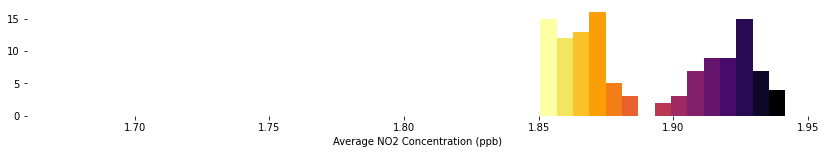

In [561]:
# Neighborhood 1
# Histogram
fig, ax = plt.subplots(figsize = (14, 2))
n, bins, patches = plt.hist(df1["no2_predicted"], bins = 15)

cm = plt.cm.get_cmap('inferno')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - max(bin_centers)
col /= min(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

ax.set_xlabel("Average NO2 Concentration (ppb)")
for ax, spine in ax.spines.items():
    spine.set_visible(False)

plt.xlim(1.66, 1.95)

(1.66, 1.95)

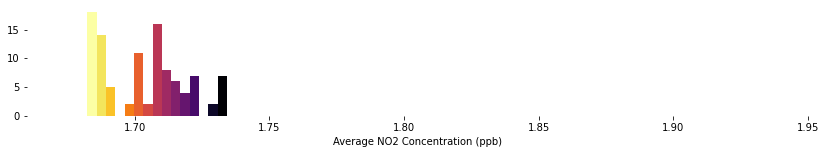

In [562]:
# Neighborhood 2
# Histogram
fig, ax = plt.subplots(figsize = (14, 2))
n, bins, patches = plt.hist(df2["no2_predicted"], bins = 15)

cm = plt.cm.get_cmap('inferno')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - max(bin_centers)
col /= min(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

ax.set_xlabel("Average NO2 Concentration (ppb)")
for ax, spine in ax.spines.items():
    spine.set_visible(False)

plt.xlim(1.66, 1.95)

(1.66, 1.95)

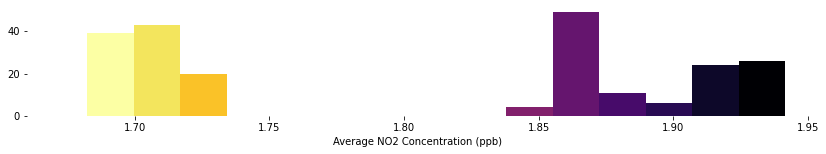

In [563]:
# Histogram
fig, ax = plt.subplots(figsize = (14, 2))
n, bins, patches = plt.hist(df_no2_predict["no2_predicted"], bins = 15)

cm = plt.cm.get_cmap('inferno')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - max(bin_centers)
col /= min(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

ax.set_xlabel("Average NO2 Concentration (ppb)")
for ax, spine in ax.spines.items():
    spine.set_visible(False)

plt.xlim(1.66, 1.95)